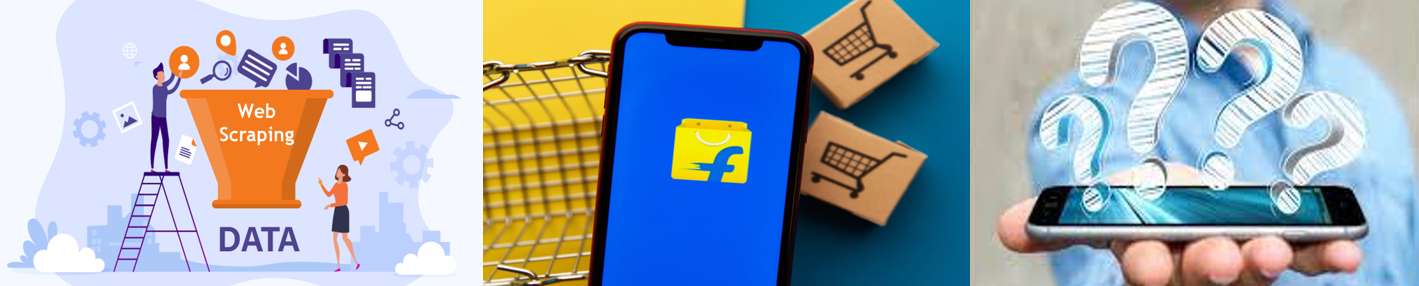

#### Project Overview
- The project aims to analyze and understand the trends in mobile phones available on Flipkart. We will leverage web scraping techniques to collect comprehensive data to identifying popular features, customer preferences, and competitive pricing strategies within the specified price range.

#### Data Source & Brief
- Data has been collected from Flipkart, it is one of India's largest and most prominent e-commerce platforms, headquartered in Bengaluru, Karnataka. Founded in 2007, Flipkart has played a significant role in shaping the e-commerce landscape in India.
- Flipkart has been chosen as the target e-commerce platform due to its popularity and extensive product listings. 

#### Project Outline
- Data Collection (Web Scraping): Using Python, Beautiful Soup, and Requests for extraction.
- Data Cleaning and Preprocessing: Addressing missing and inconsistent data, Standardizing data types and handling outliers.
- Exploratory Data Analysis (EDA): Descriptive statistics overview.
- Feature Engineering: Creating new features for enhanced predictive power. 
- Model Building: Constructing models- Linear Regression, RandomForest, GradientBoosting, XGBoost Regressor, Stacking Regressor.
- Exploring models with and without hyperparameter tuning for comparison.
- Summarizing key findings and trends in the Flipkart mobile market under ₹50,000.

#### Import basic Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import re
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#### Web Scraping
- Web scraping is the process of extracting data from websites. It involves fetching web pages, parsing the HTML or XML content, and then extracting relevant information.
- Python, along with libraries such as Beautiful Soup and Requests, will be employed for web scraping.

#### BeautifulSoup
BeautifulSoup is a Python library that provides tools for web scraping HTML and XML documents. It is commonly used for pulling data out of HTML and XML files, making it easier to navigate, search, and manipulate the parsed data.

In [2]:
from bs4 import BeautifulSoup as soup

#### requests
- requests is a popular Python library for making HTTP requests. It simplifies the process of sending HTTP requests and receiving responses, making it easy to interact with web services, APIs, and websites. 

In [3]:
import requests

#### response codes
- HTTP response codes are three-digit numbers returned by a server in response to a client's request made to the server. These codes provide information about the status of the request and the outcome of the server's attempt to process it.
- 2xx series: Indicates that the request was successfully received, understood, and accepted.
- 3xx series: Indicates redirection. The client needs to take additional action to complete the request.
- 4xx series: Indicates client error. The request contains bad syntax or cannot be fulfilled.
- 5xx series: Indicates server error. The server failed to fulfill a valid request.

In [4]:
url="https://www.flipkart.com/search?q=mobiles%20under%2050000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
url

'https://www.flipkart.com/search?q=mobiles%20under%2050000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [5]:
webpage=requests.get(url)
webpage

<Response [200]>

#### HTML structure

In [83]:
bsobj=soup(webpage.text,'lxml')

#### Loop function for taking data from Multiple pages

In [84]:
Product = []
Prices = []
Description = []
Ratings = []
Specifications = []

for i in range(1, 100):
    url = f"https://www.flipkart.com/search?q=mobiles+under+50000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}"
    webpage = requests.get(url)
    bsobj = soup(webpage.text, 'html.parser')
    
    # Extract product names
    names = bsobj.findAll('div', class_='_4rR01T')
    for name in names:
        Product.append(name.text)

    # Extract prices
    prices = bsobj.findAll('div', class_='_30jeq3 _1_WHN1')
    for price in prices:
        Prices.append(price.text)

    # Extract descriptions
    desc = bsobj.findAll('ul', class_='_1xgFaf')
    for description in desc:
        Description.append(description.text)

    # Extract ratings
    ratings = bsobj.findAll('div', {'class': '_3LWZlK'})  
    for rating in ratings:
        Ratings.append(rating.text)

    # Extract specifications
    specs = bsobj.findAll('div', {'class': '_1AtVbE'})  
    for spec in specs:
        Specifications.append(spec.text)
print(len(Product))
print('-------------------------'*5)
print(len(Prices))
print('-------------------------'*5)
print(len(Description))
print('-------------------------'*5)
print(len(Ratings))
print('-------------------------'*5)
print(len(Specifications))

984
-----------------------------------------------------------------------------------------------------------------------------
984
-----------------------------------------------------------------------------------------------------------------------------
984
-----------------------------------------------------------------------------------------------------------------------------
1593
-----------------------------------------------------------------------------------------------------------------------------
1328


#### Ensure all lists have the same length
- It happens due to variations in the HTML structure of the web pages.

In [10]:
min_length = min(len(Product), len(Prices), len(Description), len(Ratings), len(Specifications))

Product = Product[:min_length]
Prices = Prices[:min_length]
Description = Description[:min_length]
Ratings = Ratings[:min_length]
Specifications = Specifications[:min_length]

#### Create DataFrame

In [11]:
data = {'Product': Product,'Prices': Prices,'Description': Description,'Ratings': Ratings,'Specifications': Specifications}
df = pd.DataFrame(data)
df.head()

,Product,Prices,Description,Ratings,Specifications
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...
1,"Google Pixel 7 (Lemongrass, 128 GB)","₹46,999",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,Need help?Help me decide
2,"SAMSUNG Galaxy S22 5G (Green, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,HomeMobiles & AccessoriesMobilesShowing 1 – 24...
3,"SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,Add to CompareSAMSUNG Galaxy S22 5G (Phantom W...
4,"Google Pixel 7 (Snow, 128 GB)","₹46,999",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,"Add to CompareGoogle Pixel 7 (Lemongrass, 128 ..."


#### Convert DataFrame to a csv file

In [12]:
df.to_csv('flipkart_mobiles_data.csv', index=False)

#### Load the Dataset

In [13]:
df=pd.read_csv('flipkart_mobiles_data.csv')
df.head()

,Product,Prices,Description,Ratings,Specifications
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...
1,"Google Pixel 7 (Lemongrass, 128 GB)","₹46,999",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,Need help?Help me decide
2,"SAMSUNG Galaxy S22 5G (Green, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,HomeMobiles & AccessoriesMobilesShowing 1 – 24...
3,"SAMSUNG Galaxy S22 5G (Phantom Black, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,Add to CompareSAMSUNG Galaxy S22 5G (Phantom W...
4,"Google Pixel 7 (Snow, 128 GB)","₹46,999",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,"Add to CompareGoogle Pixel 7 (Lemongrass, 128 ..."


#### Basic information about the dataset

In [14]:
df.shape  # Checking shape

(984, 5)

In [15]:
df.columns  # Checking column names

Index(['Product', 'Prices', 'Description', 'Ratings', 'Specifications'], dtype='object')

In [16]:
df.info()  # Checking info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product         984 non-null    object 
 1   Prices          984 non-null    object 
 2   Description     984 non-null    object 
 3   Ratings         984 non-null    float64
 4   Specifications  953 non-null    object 
dtypes: float64(1), object(4)
memory usage: 38.6+ KB


In [17]:
df.duplicated().sum()   # No duplicates are there

0

In [18]:
df.isnull().sum()   # Checking null values 

Product            0
Prices             0
Description        0
Ratings            0
Specifications    31
dtype: int64

- Specifications has 31 null values

#### Data Pre Processing - Part 1

#### 1. Cleaning Product variable
- by breaking it down into 4 new variables - Brand_name, Mobile_name & Color and removing unnecessary info

In [19]:
df['Product'].value_counts()

I Kall K3310                                                                                      8
Kechaoda K115                                                                                     7
Cellecor C60+                                                                                     7
Kechaoda K33                                                                                      6
Kechaoda A26                                                                                      6
Cellecor X3                                                                                       6
MTR Ferrari                                                                                       5
KARBONN K110i                                                                                     5
IAIR D23 Dual Sim Keypad Phone | 1200 mAH Battery & Big 1.88 Inch Display                         5
Nokia 106                                                                                         4


In [20]:
df['Brand_name'] = df['Product'].str.split().str[0]
df['Model_name'] = df['Product'].str.split().str[1:3].str.join(' ').str.replace(r'\(|\)', '')
df['Color'] = df['Product'].str.extract(r'\(([^,]+),')[0].str.replace(r'\(|\)|2|150W', '')

In [21]:
df.head(2)

,Product,Prices,Description,Ratings,Specifications,Brand_name,Model_name,Color
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...,SAMSUNG,Galaxy S22,Phantom White
1,"Google Pixel 7 (Lemongrass, 128 GB)","₹46,999",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,Need help?Help me decide,Google,Pixel 7,Lemongrass


In [22]:
df.head(2)

,Product,Prices,Description,Ratings,Specifications,Brand_name,Model_name,Color
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)","₹49,999",8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...,SAMSUNG,Galaxy S22,Phantom White
1,"Google Pixel 7 (Lemongrass, 128 GB)","₹46,999",8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,Need help?Help me decide,Google,Pixel 7,Lemongrass


#### 2. Cleaning Price variable
- by removing comma and ₹ symbol and converting it into integer

In [23]:
df['Prices'].value_counts()

₹11,999      27
₹39,999      18
₹8,499       18
₹6,999       15
₹18,999      14
₹12,999      14
₹9,499       14
₹16,999      13
₹42,999      13
₹5,999       13
₹9,999       13
₹10,999      13
₹7,499       12
₹13,999      12
₹49,999      12
₹19,999      12
₹22,999      11
₹21,999      11
₹38,999      11
₹36,999      11
₹28,999       9
₹13,499       9
₹10,499       8
₹729          8
₹23,999       8
₹999          8
₹8,299        7
₹26,999       7
₹27,999       7
₹975          7
₹14,999       7
₹1,350        7
₹949          6
₹5,499        6
₹959          6
₹41,999       6
₹32,999       6
₹17,999       6
₹39,900       5
₹24,999       5
₹66,999       5
₹30,999       5
₹31,999       5
₹11,499       5
₹8,999        5
₹37,990       5
₹39,990       5
₹74,999       5
₹1,40,990     5
₹37,999       5
₹1,099        5
₹29,999       5
₹1,299        5
₹15,999       4
₹6,499        4
₹54,999       4
₹12,499       4
₹940          4
₹1,169        4
₹14,490       4
₹83,999       4
₹14,499       4
₹7,299  

In [24]:
df['Prices'] = df['Prices'].str.replace('₹', '').str.replace(',', '')
df['Prices'] = df['Prices'].astype(int)

In [25]:
df.head(2)

,Product,Prices,Description,Ratings,Specifications,Brand_name,Model_name,Color
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)",49999,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...,SAMSUNG,Galaxy S22,Phantom White
1,"Google Pixel 7 (Lemongrass, 128 GB)",46999,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,Need help?Help me decide,Google,Pixel 7,Lemongrass


#### 3. Cleaning description variable
- by breaking it down into RAM & ROM and converting it into numeric types

In [26]:
df['RAM'] = df['Description'].str.extract(r'(\d+) GB RAM')
df['ROM'] = df['Description'].str.extract(r'(\d+) GB ROM')

In [27]:
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')
df['ROM'] = pd.to_numeric(df['ROM'], errors='coerce')

In [28]:
df.head(2)

,Product,Prices,Description,Ratings,Specifications,Brand_name,Model_name,Color,RAM,ROM
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)",49999,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4.4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...,SAMSUNG,Galaxy S22,Phantom White,8.0,128.0
1,"Google Pixel 7 (Lemongrass, 128 GB)",46999,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4.3,Need help?Help me decide,Google,Pixel 7,Lemongrass,8.0,128.0


#### 4. Cleaning Ratings variable
- by converting it into numeric & grouping them in 5 clusters 

In [29]:
df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

bins = [-float('inf'), 1.9, 2.9, 3.9, 4.9, float('inf')]
labels = [1, 2, 3, 4, 5]
df['Ratings'] = pd.cut(df['Ratings'], bins=bins, labels=labels, include_lowest=True)
df['Ratings'] = df['Ratings'].astype('int64')

In [30]:
df.head(2)

,Product,Prices,Description,Ratings,Specifications,Brand_name,Model_name,Color,RAM,ROM
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)",49999,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...,SAMSUNG,Galaxy S22,Phantom White,8.0,128.0
1,"Google Pixel 7 (Lemongrass, 128 GB)",46999,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4,Need help?Help me decide,Google,Pixel 7,Lemongrass,8.0,128.0


#### 5. Cleaning Specifications variable
- by breaking it into Battery, MP_Frontcamera, MP_Backcamera variables

In [31]:
# Taking numeric value before mAh
df['Battery'] = df['Specifications'].str.extract(r'(\d+) mAh', expand=False)
df['Battery'] = pd.to_numeric(df['Battery'], errors='coerce')

In [32]:
# Taking numeric value before Front camera
df['MP_Frontcamera'] = df['Specifications'].str.extract(r'(\d+)\s*MP\s*Front Camera', flags=re.IGNORECASE, expand=False)
df['MP_Frontcamera'] = pd.to_numeric(df['MP_Frontcamera'], errors='coerce')

In [33]:
# Taking numeric value after Display
df['MP_Backcamera'] = df['Specifications'].str.extract(r'Display[^0-9]*?(\d+)\s*MP', flags=re.IGNORECASE, expand=False)
df['MP_Backcamera'] = pd.to_numeric(df['MP_Backcamera'], errors='coerce')

In [34]:
df.head(2)

,Product,Prices,Description,Ratings,Specifications,Brand_name,Model_name,Color,RAM,ROM,Battery,MP_Frontcamera,MP_Backcamera
0,"SAMSUNG Galaxy S22 5G (Phantom White, 128 GB)",49999,8 GB RAM | 128 GB ROM15.49 cm (6.1 inch) Full ...,4,FiltersCATEGORIESMobiles & AccessoriesMobilesP...,SAMSUNG,Galaxy S22,Phantom White,8.0,128.0,NaN,NaN,NaN
1,"Google Pixel 7 (Lemongrass, 128 GB)",46999,8 GB RAM | 128 GB ROM16.0 cm (6.3 inch) Full H...,4,Need help?Help me decide,Google,Pixel 7,Lemongrass,8.0,128.0,NaN,NaN,NaN


#### 6. Dropping non-significant variables
- Dropping Product, Description & Specifications variable as we have already extracted data from them.

In [35]:
df.drop(columns=['Product','Description','Specifications'], inplace=True)

In [36]:
df.head(2)

,Prices,Ratings,Brand_name,Model_name,Color,RAM,ROM,Battery,MP_Frontcamera,MP_Backcamera
0,49999,4,SAMSUNG,Galaxy S22,Phantom White,8.0,128.0,NaN,NaN,NaN
1,46999,4,Google,Pixel 7,Lemongrass,8.0,128.0,NaN,NaN,NaN


#### 7. Missing Values Treatment

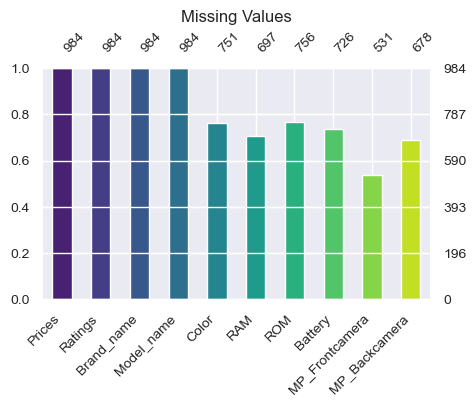

In [37]:
import missingno as msno
colors = sns.color_palette('viridis', n_colors=len(df.columns))
msno.bar(df, figsize=(5,3), color=colors, fontsize=10)
plt.title('Missing Values')
plt.show()

In [38]:
df.isnull().sum()/len(df)

Prices            0.000000
Ratings           0.000000
Brand_name        0.000000
Model_name        0.000000
Color             0.236789
RAM               0.291667
ROM               0.231707
Battery           0.262195
MP_Frontcamera    0.460366
MP_Backcamera     0.310976
dtype: float64

#### Checking Outliers 

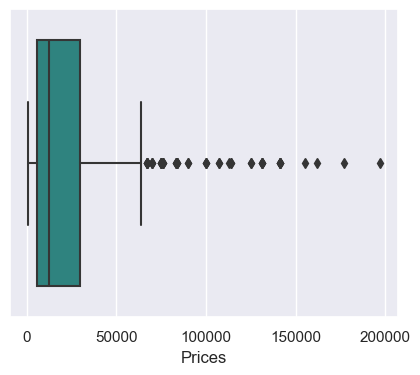

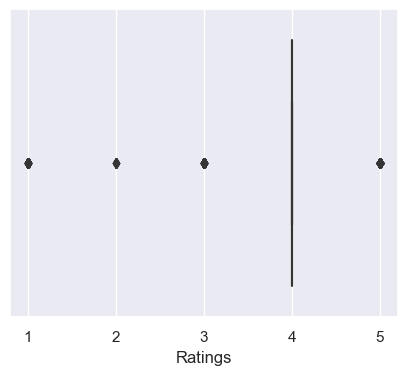

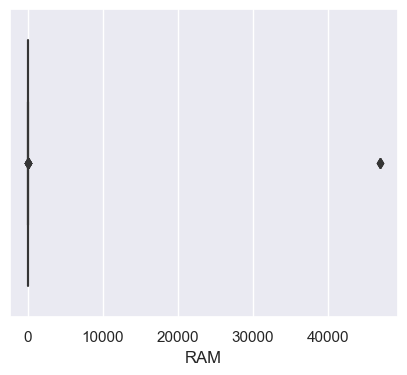

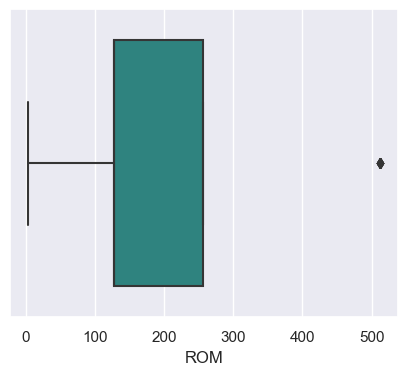

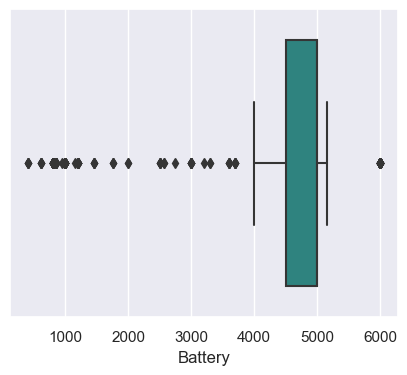

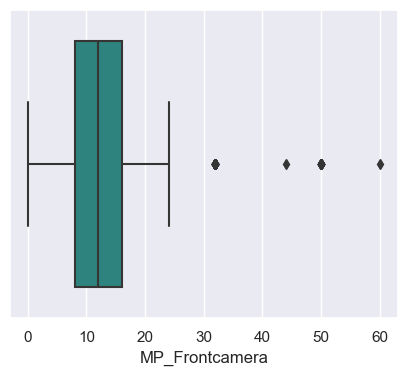

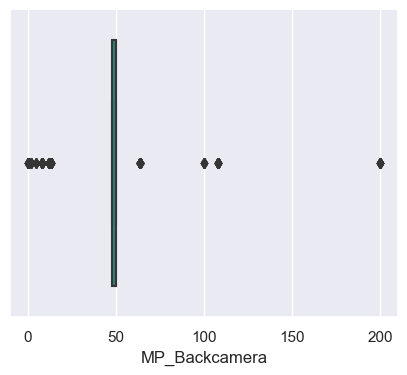

In [39]:
def boxplots(col):
    plt.figure(figsize=(5,4))    
    sns.boxplot(df,x=col,palette='viridis')
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i) 

In [40]:
# Filling missing values of object variable - Color with Other_colors
df['Color'] = df['Color'].fillna('Other_colors')

# Filling missing values of variables having outliers with median
df['RAM']=df['RAM'].fillna(df['RAM'].median())
df['ROM']=df['ROM'].fillna(df['ROM'].median())
df['Battery']=df['Battery'].fillna(df['Battery'].median())
df['MP_Backcamera']=df['MP_Backcamera'].fillna(df['MP_Backcamera'].median())

# Dropping MP_Frontcamera variable as it has high percentage of missing values
df = df.drop(['MP_Frontcamera'], axis=1)

In [41]:
df.describe().T.style.background_gradient(cmap='Blues')   #Statistical Analysis on Numerical Columns

,count,mean,std,min,25%,50%,75%,max
Prices,984.000000,21017.277439,24866.406352,575.000000,5839.000000,12549.000000,29999.000000,196900.000000
Ratings,984.000000,3.894309,0.854054,1.000000,4.000000,4.000000,4.000000,5.000000
RAM,984.000000,150.286585,2585.198852,1.000000,6.000000,8.000000,8.000000,46875.000000
ROM,984.000000,145.087398,70.650836,3.000000,128.000000,128.000000,128.000000,512.000000
Battery,984.000000,4438.092480,1399.978861,400.000000,4600.000000,5000.000000,5000.000000,6000.000000
MP_Backcamera,984.000000,51.594512,28.347129,0.000000,50.000000,50.000000,50.000000,200.000000


#### Segregation of Numerical and Categorical Variables/Columns

In [42]:
categorical_col = df.select_dtypes(include = ['object']).columns
numerical_col = df.select_dtypes(exclude = ['object']).columns

#### Exploratory Data Analysis - Univariate Analysis

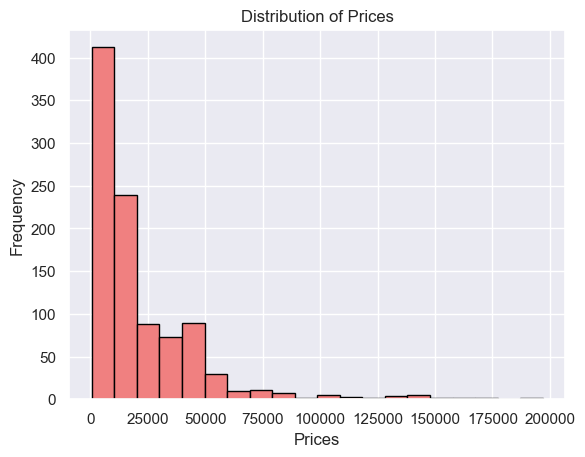

In [43]:
plt.hist(df['Prices'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency')
plt.show()

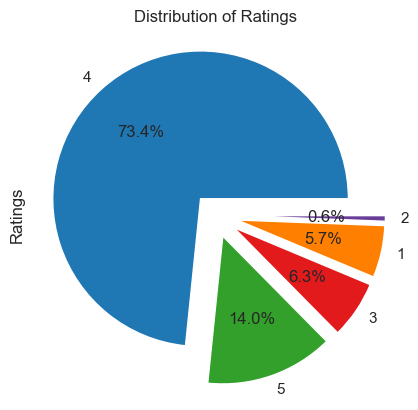

In [44]:
colors = ['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a']
df['Ratings'].value_counts().plot(kind='pie', explode=[0.15, 0.15, 0.15, 0.15, 0.15], autopct='%0.1f%%', colors=colors)
plt.title('Distribution of Ratings')
plt.show()

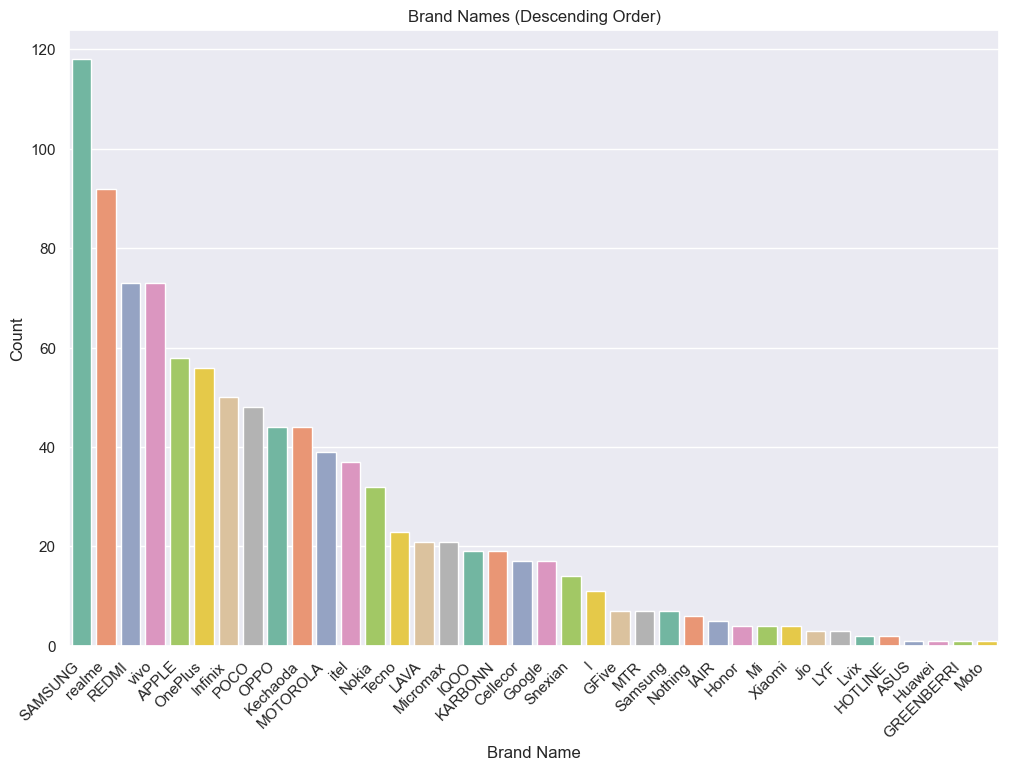

In [45]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Brand_name', data=df, palette='Set2', order=df['Brand_name'].value_counts().index)
plt.title('Brand Names (Descending Order)')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

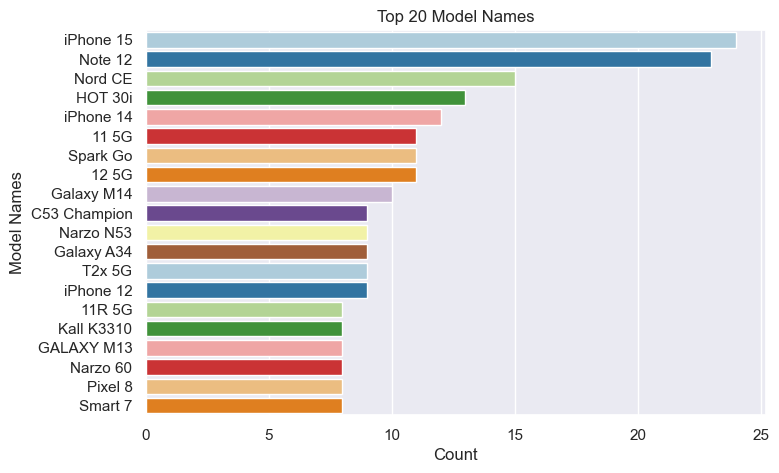

In [47]:
top = 20  
top_models = df['Model_name'].value_counts().nlargest(top)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_models.values, y=top_models.index, palette='Paired')
plt.title(f'Top {top} Model Names')
plt.xlabel('Count')
plt.ylabel('Model Names')
plt.show()

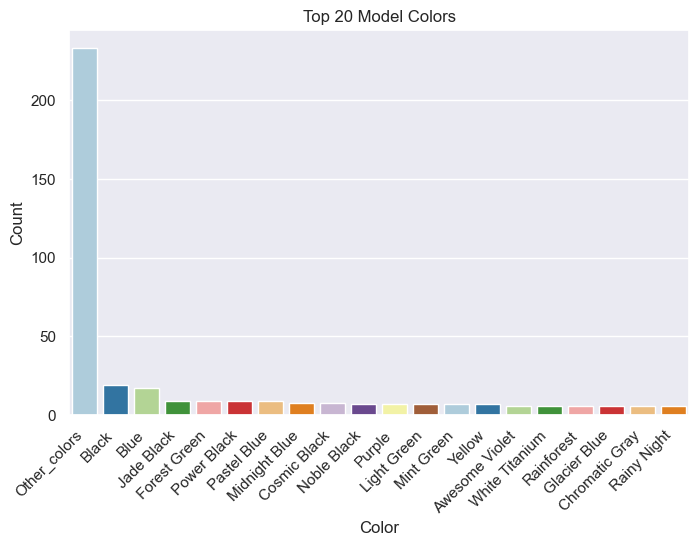

In [48]:
top = 20
top_colors = df['Color'].value_counts().nlargest(top)
plt.figure(figsize=(8,5))
sns.barplot(x=top_colors.index, y=top_colors.values, palette='Paired')
plt.title(f'Top {top} Model Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()

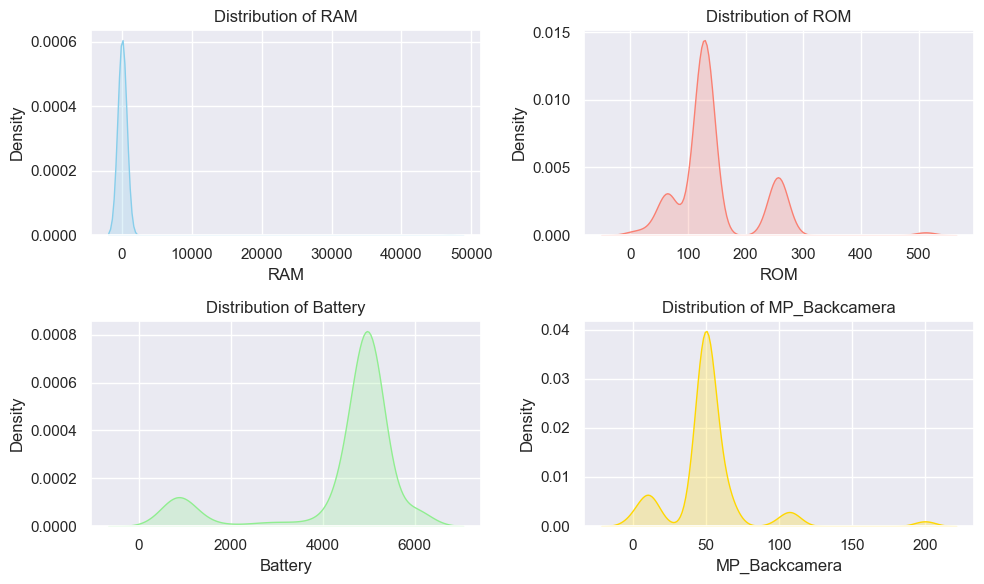

In [49]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.kdeplot(df['RAM'], color='skyblue', shade=True)
plt.title('Distribution of RAM')

plt.subplot(2, 2, 2)
sns.kdeplot(df['ROM'], color='salmon', shade=True)
plt.title('Distribution of ROM')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Battery'], color='lightgreen', shade=True)
plt.title('Distribution of Battery')

plt.subplot(2, 2, 4)
sns.kdeplot(df['MP_Backcamera'], color='gold', shade=True)
plt.title('Distribution of MP_Backcamera')

plt.tight_layout()
plt.show()

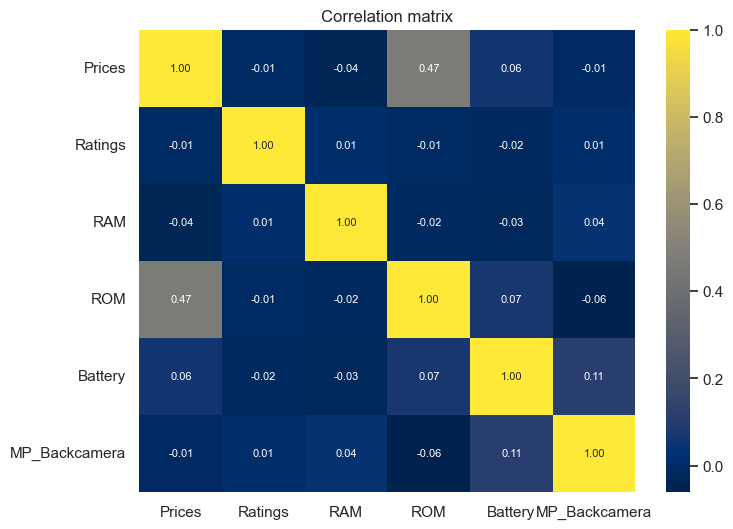

In [50]:
plt.figure(figsize=(8, 6)) 
sns.heatmap(df.corr(), annot=True, cmap='cividis', annot_kws={'size': 8}, fmt=".2f")
plt.title('Correlation matrix')
plt.show()

#### Data Pre Processing - Part 2

#### 1. Outliers Treatment

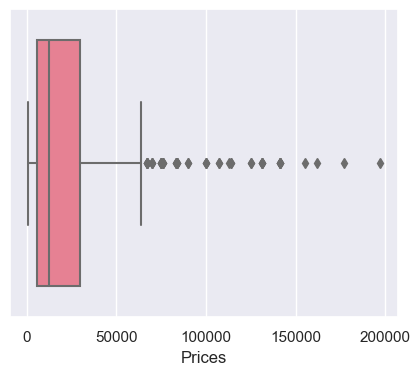

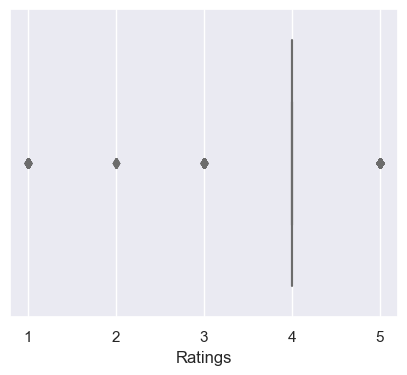

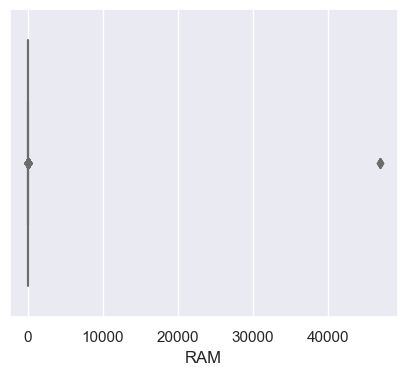

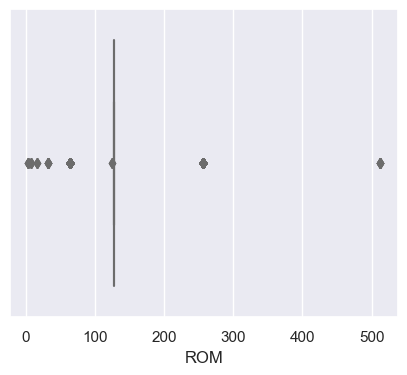

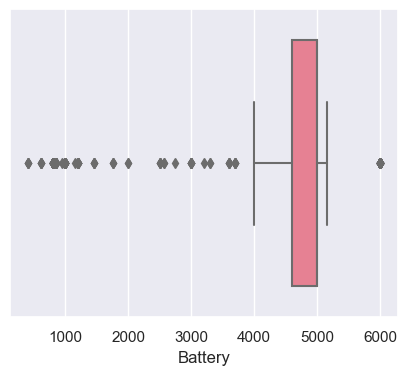

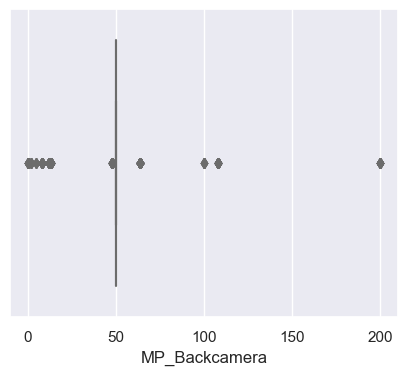

In [51]:
def boxplots(col):
    plt.figure(figsize=(5,4))    
    sns.boxplot(df,x=col,palette='husl')
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object']).columns)[0:]:
    boxplots(i) 

In [52]:
def outlier(col):
    q3=df[col].quantile(0.75)
    q1=df[col].quantile(0.25)
    IQR=q3-q1
    Lower=q1-1.5*IQR
    Upper=q3+1.5*IQR
    df[col].clip(Lower,Upper,inplace=True)  

In [53]:
for i in numerical_col:
    outlier(i)

#### 2. Encoding
- Color, Brand_name & Model_name are categorical values, we need to encode them.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prices         984 non-null    int32  
 1   Ratings        984 non-null    int64  
 2   Brand_name     984 non-null    object 
 3   Model_name     984 non-null    object 
 4   Color          984 non-null    object 
 5   RAM            984 non-null    float64
 6   ROM            984 non-null    float64
 7   Battery        984 non-null    float64
 8   MP_Backcamera  984 non-null    float64
dtypes: float64(4), int32(1), int64(1), object(3)
memory usage: 65.5+ KB


##### Checking unique values

In [55]:
unique_colors = df['Color'].nunique()
print(f'Number of unique colors: {unique_colors}')

Number of unique colors: 305


In [56]:
Brand_name = df['Brand_name'].nunique()
print(f'Number of unique brands: {Brand_name}')

Number of unique brands: 38


In [57]:
Model_name = df['Model_name'].nunique()
print(f'Number of unique model names: {Model_name}')

Number of unique model names: 332


#### 1. Color variable
- 307 unique values are present in Color variable so we will group them in similar colors

In [58]:
# List of colors to group
black_colors = ['Phantom Black', 'Sonic Black', 'Black', 'Volcanic Black', 'Moonstone Black', 'Glazed Black','Cosmic Black',
                'Starlight Black', 'Iconic Black', 'Midnight Black', 'Shimmer Black', 'Interstellar Black','Pure Black',
                'Asphalt Black', 'Noble Black', 'Stardust Black', 'Awesome Black', 'Predator Black','Stellar Black',
                'Astral Black', 'Glimmer Black', 'Power Black', 'Timber Black', 'Matte Black','New Moon Black', 'Jade Black',
                'Black Beauty', 'Black Dusk', 'Champion Black', 'Galactic Black','Classic Black', 'Mirror Black',
                'Eclipse Black', 'Glory Black', 'Ink Black', 'Feather Black','Lunar Black','Obsidian Black', 'OMG Black',
                'Night Black', 'Electric Black', 'Gravity Black','Prime Black', 'Carbon Black', 'Noble Black','Black Titanium',
                'Starry Black', 'Steller Black','Stardust Black','Blue Black', 'Rush Black', 'SHADOW BLACK', 'Cool Black',
                '?Cosmic Black','Mystery Black', 'Predawn Black', 'Starlight Black', 'Titan Black', 'Submariner Black',
                'Nebula Black','Burgundy Black', 'Glowing Black', 'Black Engine', 'Cosmic Black', '?Cosmic Black']
blue_colors = ['Blue', 'Startrails Blue', 'Magic Blue', 'Nitro Blue', 'Meteor Blue', 'Couture Blue','Sailing Blue','Frost Blue',
               'Awesome Blue', 'Astral Blue', 'Urban Blue', 'Marine Blue','Blue Tide', 'Cool Blue', 'Royal Blue', 'Orion Blue',
               'Interstellar Blue', 'Azure Blue','Berry Blue', 'Metaverse Blue','Little Boy Blue', 'Lake Blue', 'Iceberg Blue',
               'Azure Blue', 'Blue Lagoon', 'Dark Blue', 'Electric Blue', 'Norway Blue', 'Galaxy Blue','Mystique Blue',
               'Arctic Blue', 'Navy Blue', 'Light Blue', 'Dark Blue', 'Blue Black','Swag Blue', 'Deep Blue', 'Dashing Blue',
               'Serenity Blue', 'Magic Skin Blue', 'Meta Blue','UYUNI BLUE', 'Light Blue', 'Midnight Blue', 'Metallic Blue']
gold_colors = ['Gold', 'Solar Gold', 'Shiny Gold', 'Dune Gold', 'Champion Gold', 'Marigold', 'Sunset Gold','Sunrise Gold',
               'Feather Gold', 'Golden', 'Golden Hour', 'Desert Gold', 'Luxurious Gold','Drizzling Gold', 'Bold Gold',
               'Dawnlight Gold', 'Glowing Gold', 'Silk Gold']
white_colors = ['Phantom White', 'White', 'Awesome White', 'Sprint White', 'Diamond White','Alpine White', 'Jade White',
                'Creamy White','Mystery White','Clash White','White Titanium','Arctic White', 'Pearly White','Starburst White']
silver_colors = ['Silver', 'Galactic Silver', 'Silvery Grey', 'Diamond Silver','Awesome Silver', 'Stardust Silver',
                 'Moonlight Silver', 'Lunar Silver','Quantum Silver', 'Mystic Silver', 'Nano Silver', 'Icy Silver',
                 'Moonstone Silver', 'Satin Silver', 'Startrail Silver']
green_colors = ['Green', 'Jade Green', 'Moss Green', 'Glazed Green', 'Jade Green', 'Moss Green','Misty Green', 'Emerald Green',
                'Emerald Green', 'Forest Green', 'Aurora Green','Mint Green', 'Aurora Green', 'Crystal Green', 'Forest Green',
                'Mint Green','Forest Green', 'Supernova Green', 'Forest Green', 'Forest Green', 'Nebula Green','Sea Green',
                'Oasis Green', 'Oasis Green', 'Forest Green', 'GOAT Green','Forest Green', 'Oasis Green', 'Mint Green',
                'GOAT Green', 'Emerald Green','Emerald Green', 'Green', 'Starshine Green', 'Green Apple', 'Frosted Green',
                'Frosted Green', 'Stellar Green', 'Rome Green', 'Stellar Green', 'Dazzling Green','Rome Green', 'Frosted Green',
                'Sea Green', 'Startrail Green', 'Jungle Green','GLACIER GREEN', 'Aurora Green', 'Light Green', 'Nightsky Green',
                'Blaster Green','Mint Green', 'Startrail Green', 'Mystic Green', 'Light Green', 'Stellar Green','Playful Green',
                'Eternal Green', 'Starshine Green', 'Nightsky Green', 'Green','Aqua Green', 'Mint Green', 'Starshine Green',
                'Startrail Green', 'Aqua Green','Pure Green', 'Light Green', 'Forest Green', 'Mint Green', 'Glowing Green',
                'Aurora Green', 'Blaster Green', 'Forest Green', 'Green', 'Glass Green','Frosted Green', 'Forest Green',
                'Mint Green', 'Blaster Green', 'Pure Green','Meadow Green', 'Aurora Green', 'Coral Green', 'Forest Green',
                'Light Green','Coral Green', 'Glass Green']

def group_colors(color):
    if color in black_colors:
        return 'Black'
    elif color in blue_colors:
        return 'Blue'
    elif color in gold_colors:
        return 'Gold'
    elif color in white_colors:
        return 'White'
    elif color in silver_colors:
        return 'Silver'
    elif color in green_colors:
        return 'Green'
    else:
        return 'Others'

df['Color'] = df['Color'].apply(group_colors)

unique_colors = df['Color'].nunique()
print(f'Number of unique colors: {unique_colors}')

Number of unique colors: 7


In [59]:
le = LabelEncoder()
df['Color'] = le.fit_transform(df['Color'])

#### 2. Brand_names
- 42 unique values are presnt in Brand_names
- We will use Target encoding to encode based on the mean of the target variable (Prices). 
- This method involves calculating the mean target value for each brand and replacing the brand with its corresponding mean. 

In [60]:
mean_encoded_brand = df.groupby('Brand_name')['Prices'].mean()
df['Brand_name'] = df['Brand_name'].map(mean_encoded_brand)

#### 3. Model_name
- Dropping this variable as its non significant for model building

In [61]:
df.drop(columns=['Model_name'], inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Prices         984 non-null    int32  
 1   Ratings        984 non-null    int64  
 2   Brand_name     984 non-null    float64
 3   Color          984 non-null    int32  
 4   RAM            984 non-null    float64
 5   ROM            984 non-null    float64
 6   Battery        984 non-null    float64
 7   MP_Backcamera  984 non-null    float64
dtypes: float64(5), int32(2), int64(1)
memory usage: 53.9 KB


#### Saving the cleaner version

In [63]:
df.to_csv('Cleaned_Version2_Flipkart_dataset.csv', index=False)

In [64]:
df=pd.read_csv('Cleaned_Version2_Flipkart_dataset.csv')
df.head()

,Prices,Ratings,Brand_name,Color,RAM,ROM,Battery,MP_Backcamera
0,49999,4,21928.203390,6,8.0,128.0,5000.0,50.0
1,46999,4,56669.588235,4,8.0,128.0,5000.0,50.0
2,49999,4,21928.203390,3,8.0,128.0,5000.0,50.0
3,49999,4,21928.203390,0,8.0,128.0,4000.0,50.0
4,46999,4,56669.588235,4,8.0,128.0,4270.0,50.0


#### Model Building

#### 1. Splitting data into independent & dependent variables

In [65]:
x= df.drop(['Prices'],axis=1)
y= df[['Prices']]

In [66]:
x.head(2)

,Ratings,Brand_name,Color,RAM,ROM,Battery,MP_Backcamera
0,4,21928.203390,6,8.0,128.0,5000.0,50.0
1,4,56669.588235,4,8.0,128.0,5000.0,50.0


In [67]:
y.head(2)

,Prices
0,49999
1,46999


#### 2. Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
pd.DataFrame(x1).head(2)

,0,1,2,3,4,5,6
0,0.0,0.176513,1.800825,0.392128,0.0,0.423827,0.0
1,0.0,2.449663,0.609957,0.392128,0.0,0.423827,0.0


#### 3. Split data into Train and Test

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.20,random_state=101) 

#### Model Building without Hyperparameter Tuning
- Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, XGB Regressor & Stacking Regressor

#### Import Libraries for Model building, prediction & evaluation

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
def model_building(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    cv_score_train = cross_val_score(model, x_train, y_train, cv=10, scoring='r2').mean()
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return cv_score_train, r2, mse

In [72]:
linear = LinearRegression()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()

# Train and evaluate models
linear_train, linear_test, _ = model_building(linear, x_train, y_train, x_test, y_test)
rf_train, rf_test, _ = model_building(rf, x_train, y_train, x_test, y_test)
gb_train, gb_test, _ = model_building(gb, x_train, y_train, x_test, y_test)
xgb_train, xgb_test, _ = model_building(xgb, x_train, y_train, x_test, y_test)

In [73]:
print("Linear Regression - Training R2:", linear_train)
print("Linear Regression - Testing R2:", linear_test)
print('-------------------------'*5)
print("Random Forest - Training R2:", rf_train)
print("Random Forest - Testing R2:", rf_test)
print('-------------------------'*5)
print("Gradient Boosting - Training R2:", gb_train)
print("Gradient Boosting - Testing R2:", gb_test)
print('-------------------------'*5)
print("XGBoost - Training R2:", xgb_train)
print("XGBoost - Testing R2:", xgb_test)

Linear Regression - Training R2: 0.7763298981456914
Linear Regression - Testing R2: 0.7315479328899837
-----------------------------------------------------------------------------------------------------------------------------
Random Forest - Training R2: 0.8128123188290715
Random Forest - Testing R2: 0.8193997171870901
-----------------------------------------------------------------------------------------------------------------------------
Gradient Boosting - Training R2: 0.8222430382369204
Gradient Boosting - Testing R2: 0.8057475814462529
-----------------------------------------------------------------------------------------------------------------------------
XGBoost - Training R2: 0.8006043934351862
XGBoost - Testing R2: 0.7788648697429389


#### Using Stacking Regressor

In [74]:
from sklearn.ensemble import StackingRegressor
stacked_model = StackingRegressor(estimators=[('rf', rf), ('gb', gb), ('xgb', xgb)],final_estimator=LinearRegression())
stacked_model.fit(x_train, y_train)
stacked_train_score = cross_val_score(stacked_model, x_train, y_train, cv=10, scoring='r2').mean()
stacked_test_score = stacked_model.score(x_test, y_test)

print("Stacked Model - Training R2:", stacked_train_score)
print("Stacked Model - Testing R2:", stacked_test_score)


Stacked Model - Training R2: 0.8210116476985082
Stacked Model - Testing R2: 0.815439073764007


#### Combining all Models in Tabular format

In [75]:
from tabulate import tabulate
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
train_accuracy_values = [linear_train, rf_train, gb_train, xgb_train]
test_accuracy_values = [linear_test, rf_test, gb_test, xgb_test]

stacked_train_score = 0.8210116476985082
stacked_test_score = 0.815439073764007
models.append('Stacked')
train_accuracy_values.append(stacked_train_score)  
test_accuracy_values.append(stacked_test_score)    

combined_accuracy = pd.DataFrame({'Model': models,'Train Accuracy': train_accuracy_values,'Test Accuracy': test_accuracy_values})
combined_accuracy = combined_accuracy.sort_values(by='Train Accuracy', ascending=False)
table = tabulate(combined_accuracy, headers='keys', tablefmt='pretty', showindex=False)
print(table)

+-------------------+--------------------+--------------------+
|       Model       |   Train Accuracy   |   Test Accuracy    |
+-------------------+--------------------+--------------------+
| Gradient Boosting | 0.8222430382369204 | 0.8057475814462529 |
|      Stacked      | 0.8210116476985082 | 0.815439073764007  |
|   Random Forest   | 0.8128123188290715 | 0.8193997171870901 |
|      XGBoost      | 0.8006043934351862 | 0.7788648697429389 |
| Linear Regression | 0.7763298981456914 | 0.7315479328899837 |
+-------------------+--------------------+--------------------+


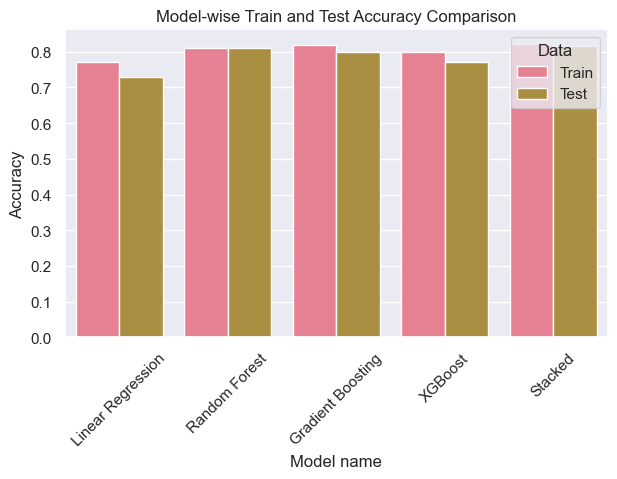

In [79]:
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
train_accuracy_values = [0.77, 0.81, 0.82, 0.80]
test_accuracy_values = [0.73, 0.81, 0.80, 0.77]

models.append('Stacked')
train_accuracy_values.append(0.821)  
test_accuracy_values.append(0.815)  

combined_accuracy = pd.DataFrame({'Model name': models * 2,'Accuracy': train_accuracy_values + test_accuracy_values,
                                  'Data': ['Train'] * len(models) + ['Test'] * len(models)})

custom_palette = sns.color_palette("husl")
plt.figure(figsize=(7,4))
sns.barplot(x='Model name', y='Accuracy', hue='Data', data=combined_accuracy, palette=custom_palette)
plt.xticks(rotation=45)
plt.title('Model-wise Train and Test Accuracy Comparison')
plt.show()

#### Model Building with Hyperparamater Tuning
- Linear Regression, Random Forest Regressor, Gradient Boosting Regressor & XGB Regressor

In [80]:
def model_building(model, parameters, x_train, y_train, x_test, y_test):
    grid_search = GridSearchCV(model, parameters, cv=10, scoring='r2', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    
    best_model = grid_search.best_estimator_    
    best_model.fit(x_train, y_train)
    cv_score_train = cross_val_score(best_model, x_train, y_train, cv=10, scoring='r2').mean()
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)    
    return cv_score_train, r2, mse

In [81]:
# Define the hyperparameters for each model
linear_parameters = {}
rf_parameters = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
gb_parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
xgb_parameters = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}

# Train and evaluate models with hyperparameter tuning
linear_train_hp, linear_test_hp, _ = model_building(LinearRegression(), linear_parameters, x_train, y_train, x_test, y_test)
rf_train_hp, rf_test_hp, _ = model_building(RandomForestRegressor(), rf_parameters, x_train, y_train, x_test, y_test)
gb_train_hp, gb_test_hp, _ = model_building(GradientBoostingRegressor(), gb_parameters, x_train, y_train, x_test, y_test)
xgb_train_hp, xgb_test_hp, _ = model_building(XGBRegressor(), xgb_parameters, x_train, y_train, x_test, y_test)

In [82]:
# Print results
print("Linear Regression - Training R2:", linear_train_hp)
print("Linear Regression - Testing R2:", linear_test_hp)
print('-------------------------'*5)
print("Random Forest - Training R2:", rf_train_hp)
print("Random Forest - Testing R2:", rf_test_hp)
print('-------------------------'*5)
print("Gradient Boosting - Training R2:", gb_train_hp)
print("Gradient Boosting - Testing R2:", gb_test_hp)
print('-------------------------'*5)
print("XGBoost - Training R2:", xgb_train_hp)
print("XGBoost - Testing R2:", xgb_test_hp)

Linear Regression - Training R2: 0.7763298981456914
Linear Regression - Testing R2: 0.7315479328899837
-----------------------------------------------------------------------------------------------------------------------------
Random Forest - Training R2: 0.8173103790332737
Random Forest - Testing R2: 0.820137038994417
-----------------------------------------------------------------------------------------------------------------------------
Gradient Boosting - Training R2: 0.8226446410508746
Gradient Boosting - Testing R2: 0.810592243037125
-----------------------------------------------------------------------------------------------------------------------------
XGBoost - Training R2: 0.8192913190359932
XGBoost - Testing R2: 0.8248509227354237


#### Conclusion
- This project aims to deliver actionable insights in the mobile market by seamlessly integrating web scraping and machine learning. 
- The end-to-end approach, from  web scraping to model building, ensures a resilient analysis of mobile pricing trends. 
- Thorough data cleaning, feature encoding, Exploratory Data Analysis (EDA), and hyperparameter tuning enhanced the models—Linear Regression, Random Forest, Gradient Boosting, XGBoost Regressor and Stacking Regressor. 
- This comprehensive methodology allows for a nuanced understanding of market dynamics, providing robust insights into mobile pricing trends and facilitating informed decision-making for both consumers and businesses.